In [107]:
"""
Created on Wed Oct 25 11:53:08 2023

@author: Carlson and O'Connor
"""

"\nCreated on Wed Oct 25 11:53:08 2023\n\n@author: Carlson and O'Connor\n"

-*- coding: utf-8 -*-

In [108]:
import networkx as nx
import matplotlib.pyplot as plt

In [109]:
 
# Plot the directed graph
def plot_directed_graph(G):
    pos = nx.spring_layout(G, k=3)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    plt.show()
 


In [110]:
 
# Set up the parameters for the cascade model
N = 10  # Number of nodes
p = 0.5  # Probability of edge creation
 


In [111]:
# Create the undirected graph using the Erdos-Renyi model
#this will make it directed such that every node has bidirectional connection w its neighbors
#we want unidirectional connections, such that j < i 
#so we will remove nodes where j>i
G = nx.erdos_renyi_graph(N, p, directed=True)


In [112]:
dic= {}

for i in range(N+1):
    dic[i]=i+1

In [113]:
nx.relabel_nodes(G, dic, copy=False)

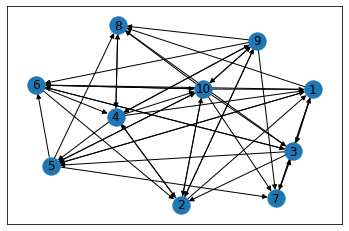

In [114]:
#see our initial graph
plot_directed_graph(G)

In [115]:
#our initial graph edges, we have some bidirectional connections but we only want unidirectional
G.edges()

OutEdgeView([(10, 9), (10, 8), (10, 7), (10, 6), (10, 5), (10, 3), (10, 2), (10, 1), (9, 10), (9, 8), (9, 7), (9, 6), (9, 4), (9, 2), (8, 4), (7, 3), (7, 1), (6, 10), (6, 4), (6, 3), (6, 2), (5, 10), (5, 8), (5, 7), (5, 6), (5, 1), (4, 10), (4, 9), (4, 8), (4, 5), (4, 2), (4, 1), (3, 8), (3, 6), (3, 5), (3, 2), (2, 10), (2, 9), (2, 4), (2, 1), (1, 8), (1, 7), (1, 6), (1, 5), (1, 3)])

In [116]:
#remove edges that go from a lower num node to a higher num node
#so now we should only have edges running from higher num node to lower
#and all edges should be unidirectional
G.remove_edges_from([(i, j) for i in range(N+1) for j in range(N+1) if i < j])

In [117]:
#check
G.edges()

OutEdgeView([(10, 9), (10, 8), (10, 7), (10, 6), (10, 5), (10, 3), (10, 2), (10, 1), (9, 8), (9, 7), (9, 6), (9, 4), (9, 2), (8, 4), (7, 3), (7, 1), (6, 4), (6, 3), (6, 2), (5, 1), (4, 2), (4, 1), (3, 2), (2, 1)])

In [118]:
no_cycle= []
adds_cycle= []

G1= G.copy()



In [119]:
for i in G.edges():
    
    G1.remove_edges_from([(i[0], i[1])])
    G1.add_edges_from([(i[1], i[0])])
    
    if nx.is_directed_acyclic_graph(G1):
        no_cycle.append(i)
    else:
        adds_cycle.append(i)
    
    
    G1.remove_edges_from([(i[1], i[0])])
    G1.add_edges_from([(i[0], i[1])])

In [120]:
no_cycle

[(10, 9),
 (10, 5),
 (9, 8),
 (9, 7),
 (9, 6),
 (8, 4),
 (7, 3),
 (6, 4),
 (6, 3),
 (5, 1),
 (4, 2),
 (3, 2),
 (2, 1)]

In [121]:
adds_cycle

[(10, 8),
 (10, 7),
 (10, 6),
 (10, 3),
 (10, 2),
 (10, 1),
 (9, 4),
 (9, 2),
 (7, 1),
 (6, 2),
 (4, 1)]

In [122]:
# Test if the graph is acyclic again
if nx.is_directed_acyclic_graph(G):
    print("The graph is acyclic.")
else:
    print("The graph contains at least one cycle.")

The graph is acyclic.


In [123]:
#additional check, this would show all cycles if they exist
list(nx.simple_cycles(G))

[]

In [124]:
#Calculate the average in-degree and out-degree of the graph
avg_in_degree = nx.average_degree_connectivity(G, source='in')
avg_out_degree = nx.average_degree_connectivity(G, source='out')
 
print("The average in-degree of the graph is:", avg_in_degree)
print("The average out-degree of the graph is:", avg_out_degree)
 


The average in-degree of the graph is: {0: 0, 1: 8.0, 2: 7.0, 3: 5.166666666666667, 5: 5.3}
The average out-degree of the graph is: {8: 4.375, 5: 4.6, 1: 5.25, 2: 5.0, 3: 5.0, 0: 0}


In [125]:
avg_in_degree = nx.average_neighbor_degree(G, source='in', target='in')
avg_out_degree = nx.average_neighbor_degree(G, source='out', target='out')
 
print("The average in-degree of the graph is:", avg_in_degree)
print("The average out-degree of the graph is:", avg_out_degree)



The average in-degree of the graph is: {10: 0.0, 9: 14.0, 8: 1.5, 7: 4.0, 6: 5.5, 5: 5.0, 4: 3.3333333333333335, 3: 1.6666666666666667, 2: 1.0, 1: 0.0}
The average out-degree of the graph is: {10: 1.75, 9: 1.8, 8: 2.0, 7: 0.5, 6: 1.3333333333333333, 5: 0.0, 4: 0.5, 3: 1.0, 2: 0.0, 1: 0.0}


In [126]:
in_= G.in_degree()

sum_of_edges = 0
ins= []

for i in range(1, len(in_)+1):
    sum_of_edges += in_[i]
    ins.append(in_[i])

In [127]:
out_= G.out_degree()

sum_of_edges = 0
outs= []

for i in range(1, len(out_)+1):
    sum_of_edges += out_[i]
    outs.append(out_[i])

In [128]:
sum_of_edges/N

2.4

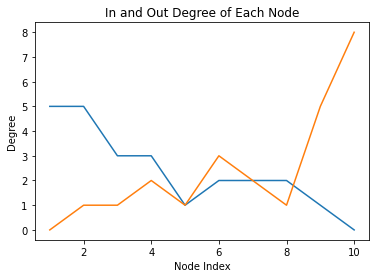

In [129]:
plt.plot(range(1, N+1), ins, label= "In degree")
plt.plot(range(1, N+1), outs, label= 'Out degree')
plt.title('In and Out Degree of Each Node')
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.savefig('MOCS_Q3_Q1_B')

In [130]:
# Calculate the expected number of edges that run from all nodes in the graph
expected_edges = 0
for i in range(1, N+1):
    ni = G.degree(i)
    expected_edges += (ni * (N - ni - 1)) / 2
print("The expected number of edges that run from all nodes in the graph is:", expected_edges)
 


The expected number of edges that run from all nodes in the graph is: 88.0


In [131]:

for i in range(1, N+1):
    
    expected_edges = 0
    expected_edges += (N*i - i**2)*p
    
    print(i , ':', expected_edges)




1 : 4.5
2 : 8.0
3 : 10.5
4 : 12.0
5 : 12.5
6 : 12.0
7 : 10.5
8 : 8.0
9 : 4.5
10 : 0.0


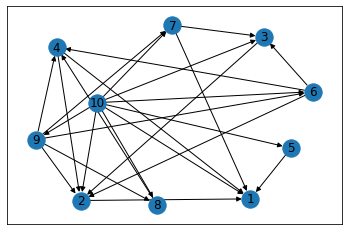

In [132]:
plot_directed_graph(G)

In [133]:
G.edges()

OutEdgeView([(10, 9), (10, 8), (10, 7), (10, 6), (10, 5), (10, 3), (10, 2), (10, 1), (9, 8), (9, 7), (9, 6), (9, 4), (9, 2), (8, 4), (7, 3), (7, 1), (6, 4), (6, 3), (6, 2), (5, 1), (4, 2), (4, 1), (3, 2), (2, 1)])

In [134]:
def exp_edges(N, i, p):
    exp = (N*i - i**2)*p
    return exp

In [135]:
p=0.5
N=100

results100=[]


for i in range(1, N+1):
    results100.append(exp_edges(N,i,p))

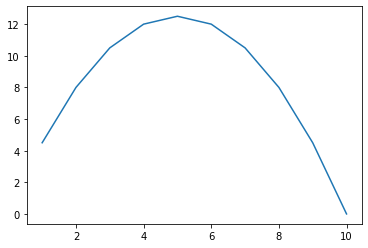

In [136]:
plt.plot(range(1, 11), results10)

In [137]:
results10

[4.5, 8.0, 10.5, 12.0, 12.5, 12.0, 10.5, 8.0, 4.5, 0.0]